In [175]:
import pandas as pd

# Load the data
file_path = 'Solana Historical Data.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/23/2024,173.631,178.961,180.495,170.868,5.17M,-2.98%
1,07/22/2024,178.958,184.414,184.860,176.837,4.47M,-2.96%
2,07/21/2024,184.414,173.614,184.959,170.733,5.01M,6.22%
3,07/20/2024,173.607,169.155,174.965,167.361,3.06M,2.63%
4,07/19/2024,169.153,159.214,171.244,156.287,6.56M,6.25%


In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# Assistant
The error occurs because the code is trying to use the `.str` accessor on columns that are not of string type. The `.str` accessor is used to access string methods on string columns in pandas.

To fix this error, you should ensure that the columns being operated on are of string type before using the `.str` accessor.

Would you like me to provide the corrected code?

# User
set this code accoding to data set

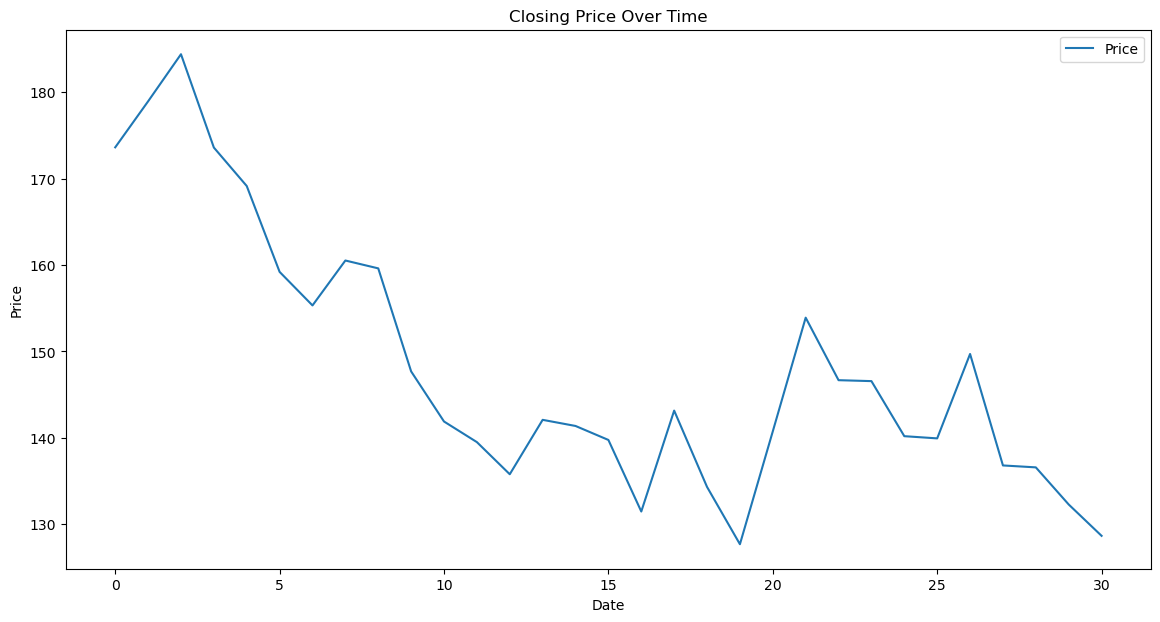

In [183]:
# Line plot of closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Price'], label='Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

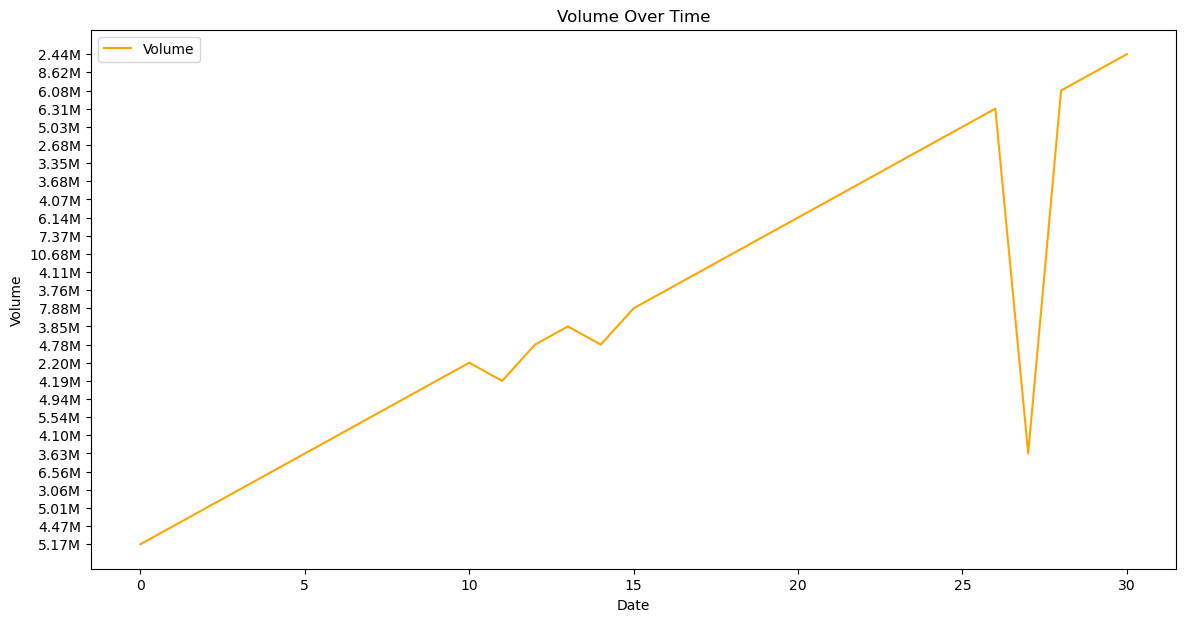

In [184]:
# Volume plot
plt.figure(figsize=(14, 7))
plt.plot(df['Vol.'], label='Volume', color='orange')  # Assuming the volume column is named 'Vol.'
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

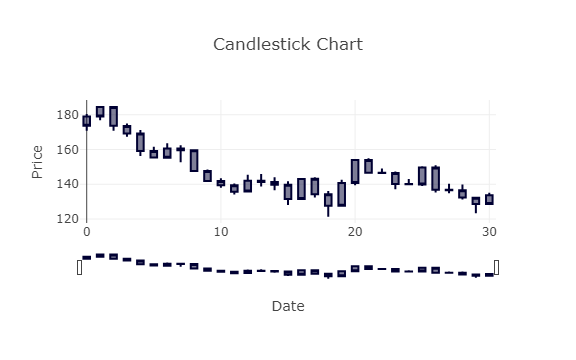

In [186]:
# Candlestick Plot
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Price'])])  # Assuming the price column is named 'Price'
fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

In [189]:
# Drop missing values from moving averages calculations
df.dropna(inplace=True)

print(df.head())

         Date    Price     Open     High      Low   Vol. Change %
0  07/23/2024  173.631  178.961  180.495  170.868  5.17M   -2.98%
1  07/22/2024  178.958  184.414  184.860  176.837  4.47M   -2.96%
2  07/21/2024  184.414  173.614  184.959  170.733  5.01M    6.22%
3  07/20/2024  173.607  169.155  174.965  167.361  3.06M    2.63%
4  07/19/2024  169.153  159.214  171.244  156.287  6.56M    6.25%


In [190]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/23/2024,173.631,178.961,180.495,170.868,5.17M,-2.98%
1,07/22/2024,178.958,184.414,184.860,176.837,4.47M,-2.96%
2,07/21/2024,184.414,173.614,184.959,170.733,5.01M,6.22%
3,07/20/2024,173.607,169.155,174.965,167.361,3.06M,2.63%
4,07/19/2024,169.153,159.214,171.244,156.287,6.56M,6.25%


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [204]:
# Remove 'M' suffix from 'Close/Last' column and convert to numeric
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [206]:
# Features and target
features = ['Open', 'High', 'Low', 'Vol.']
target = 'Price'  # Assuming the price column is named 'Price'


In [208]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Vol.ol.
0,07/23/2024,173.631,178.961,180.495,170.868,5170000.0,-2.98%,5170000.0
1,07/22/2024,178.958,184.414,184.860,176.837,4470000.0,-2.96%,4470000.0
2,07/21/2024,184.414,173.614,184.959,170.733,5010000.0,6.22%,5010000.0
3,07/20/2024,173.607,169.155,174.965,167.361,3060000.0,2.63%,3060000.0
4,07/19/2024,169.153,159.214,171.244,156.287,6560000.0,6.25%,6560000.0


In [210]:
X = df[features]
y = df[target]
# Split the data

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [214]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [216]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [218]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 1.558877278263846
RMSE: 1.9036191924051513


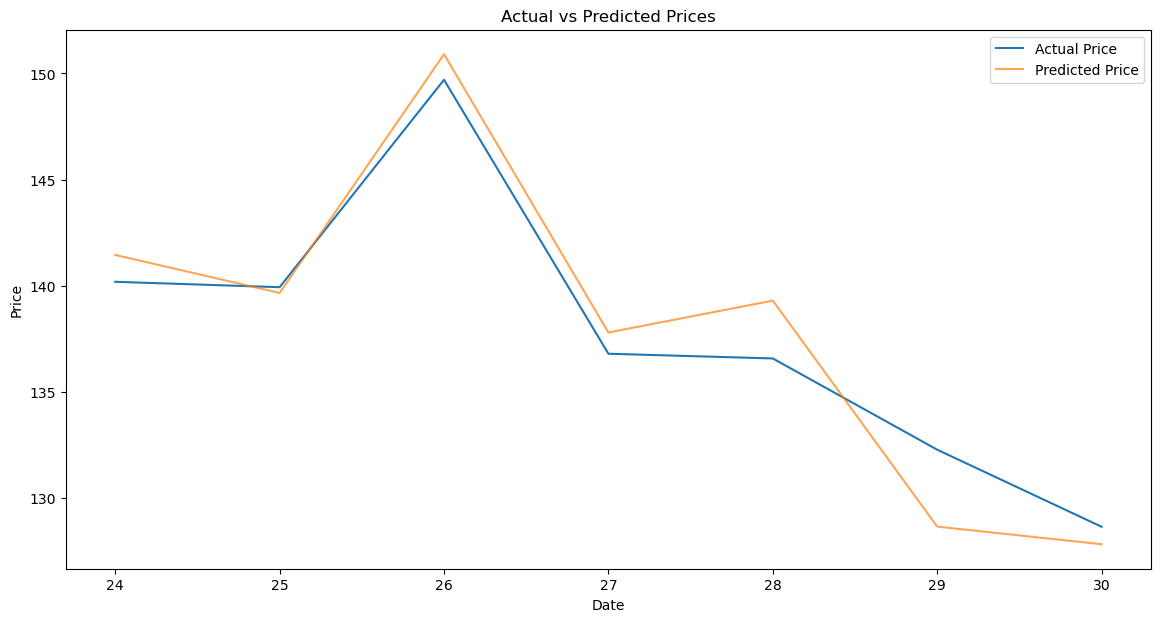

In [220]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [222]:
# Predict the price in the next month
# Assuming X_next_month contains the features for the next month
predicted_price_next_month = model.predict(X_next_month)
print(f'Predicted price in the next month: {predicted_price_next_month}')

NameError: name 'X_next_month' is not defined